In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
starbucks = pd.read_csv('starbucks.csv')

print(starbucks.head(10))

         Beverage_category       Beverage      Beverage_prep  Calories   
0                   Coffee  Brewed Coffee              Short         3  \
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   
5  Classic Espresso Drinks    Caffè Latte            2% Milk       100   
6  Classic Espresso Drinks    Caffè Latte            Soymilk        70   
7  Classic Espresso Drinks    Caffè Latte   Tall Nonfat Milk       100   
8  Classic Espresso Drinks    Caffè Latte            2% Milk       150   
9  Classic Espresso Drinks    Caffè Latte            Soymilk       110   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)   
0            0.1             0.0                0.0             0  \
1            0.1             0.0               

In [7]:
print(starbucks.shape[0])

242


In [9]:
for column in starbucks.columns:
    print(column)

Beverage_category
Beverage
Beverage_prep
Calories
 Total Fat (g)
Trans Fat (g) 
Saturated Fat (g)
 Sodium (mg)
 Total Carbohydrates (g) 
Cholesterol (mg)
 Dietary Fibre (g)
 Sugars (g)
 Protein (g) 
Vitamin A (% DV) 
Vitamin C (% DV)
 Calcium (% DV) 
Iron (% DV) 
Caffeine (mg)


In [10]:
print("DataFrame Index:", starbucks.index)

DataFrame Index: RangeIndex(start=0, stop=242, step=1)


In [17]:
average_sugar_by_drink = starbucks.groupby('Beverage')[' Sugars (g)'].mean()
drink_with_most_sugar = average_sugar_by_drink.idxmax()
highest_average_sugar = average_sugar_by_drink.max()

print("Drink with the most sugar on average:", drink_with_most_sugar)
print("Average sugar content:", highest_average_sugar)

Drink with the most sugar on average: Java Chip (Without Whipped Cream)
Average sugar content: 62.44444444444444


In [18]:
num_drink_categories = starbucks['Beverage_category'].nunique()
print(num_drink_categories)

9


In [19]:
top_drink_categories = starbucks['Beverage_category'].value_counts().head(5)

print("The 5 most frequent drink categories are:")
print(top_drink_categories)

The 5 most frequent drink categories are:
Beverage_category
Classic Espresso Drinks        58
Tazo® Tea Drinks               52
Signature Espresso Drinks      40
Frappuccino® Blended Coffee    36
Shaken Iced Beverages          18
Name: count, dtype: int64


In [20]:
average_calories_per_category = starbucks.groupby('Beverage_category')['Calories'].mean()

print("Average calorie content per drink category:")
print(average_calories_per_category)

Average calorie content per drink category:
Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64


In [25]:
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')
starbucks['Calories'] = pd.to_numeric(starbucks['Calories'], errors='coerce')
starbucks['caffeine_to_calories'] = starbucks['Caffeine (mg)'] / starbucks['Calories']

category_mean_ratios = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean()
max_ratio_category = category_mean_ratios.idxmax()

print("Category with the highest average 'caffeine_to_calories' ratio:", max_ratio_category)

Category with the highest average 'caffeine_to_calories' ratio: Coffee


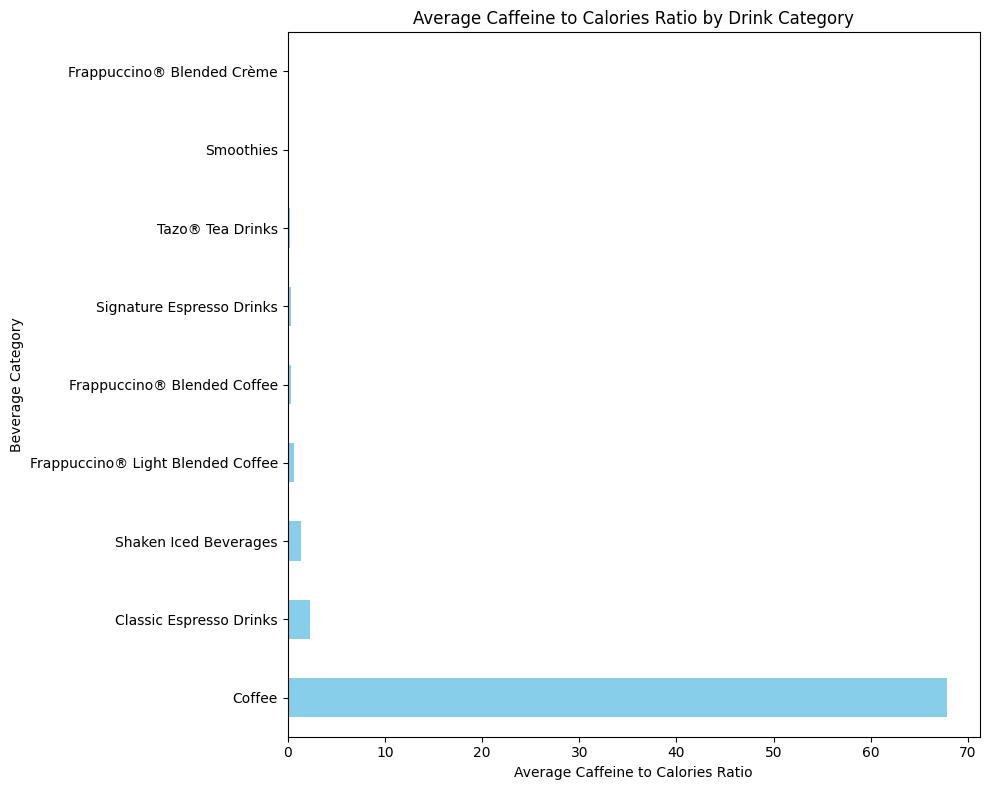

In [30]:
category_mean_ratios = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean()
category_mean_ratios = category_mean_ratios.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
category_mean_ratios.plot(kind='barh', color='skyblue')
plt.xlabel('Average Caffeine to Calories Ratio')
plt.ylabel('Beverage Category')
plt.title('Average Caffeine to Calories Ratio by Drink Category')
plt.tight_layout()